### 결정 Tree 모델 이해 및 시각화(Decision Tree Visualization)

In [1]:
# Decision Tree 이해를 위한 시각화 library 설치 명령어 
#!conda install -c anaconda graphviz python-graphviz

1. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아 tree 기반의 분류 규칙 적용
2. 트리를 어떻게 분할 할 것인가가 중요

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
from sklearn.tree import export_graphviz

# 결과를 tree.dot 라는 파일로 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)


In [6]:
# tree.dot 파일을 read해서 시각화 
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# 주황색 0 : Sentosa / 초록색 1 : Versicolor / 보라색 2 : Virginica

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**그래프 구조**

1. root 노드 : 최상위 node
2. 규칙 노드(Decision Tree) = 규칙 조건
3. 리프 노드 = 결정된 클래스값

<hr>

**주의사항**

1. tree 깊이가 깊어질수록 결정 tree의 예측 성능이 저하 될수도 있음 
2. 가급적 최대한 균일한 데이터 셋트를 구성할 수 있도록 분할 할 수있게 해야 함

<hr>

**균일도 측정 방법**

1. 균일도가 높다 라는 데이터 구조는 동일한 형식들의 데이터들로 구성되어 있다로 간주
2. 가령 : 검정색 바둑알로만 되어 있으면 균일도가 높음, 검색색 바둑알에 흰색에 조금 섰여 있다면 균일도가 중간, 흰색이 너무 많다는건 균일도가 낮다..로 간주 
3. 결정노드는 정보를 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙을 구성한다 함!!

**균일도가 높은 데이터화 하는 원리**
1. 지니 계수 사용 : 균일도 측정하는 방법
2. 지니 계수란? 경제학에서 불평등 지수를 나타댈 따 사용하는 개수, 0에 가까울수록 평등하고 1에 가까울수록 불평등...
3. sklearn API 관점 : 데이터 세트를 분할하는데 가장 좋은 조건, 즉 정보 이득이나 지니계수가 높은 조건을 찾아서 자식 tree node에 반본적으로 분할한 뒤 데이터가 모두 특정 분류에 속하게 되면 분할 stop 후 결정 

<hr>

**graphic에 표현된 문구들**

1. gini : value=[]로 주어진 데이터 분포의 지니계수
2. samples : 한 규칙에 해당하는 데이터 건수
3. value = [] : 클래스 값 기반의 데이터 건수, 현 그래프에선 0/1/2 품종을 명확하게 제시



Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

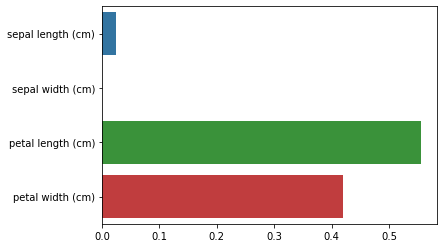

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)


**하이퍼 파라미터 튜닝**

* 학습(훈련) 데이터 최적화된 결정 tree를 구성시 과적합 문제발생 따라서 과적합 방지로 depth 조절 또는 sample 수 조절

1. max_depth - 결정 tree의 최대 깊이 제어
2. min_samples_split - 자식 결정 노드 분할해 만들기 위한 최소한의 데이터 개수 


In [8]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(min_samples_split=3, random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)


with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [9]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
import pandas as pd

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 딕셔너리 형식의 파라미터
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# refit=True가 default, True인 경우 가장 좋은 parameter 설정으로 재 학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 학습을 통한 모델 개발
grid_dtree.fit(X_train, y_train) 

# GridSearchCV 결과를 추출해서 DataFrame 변환
score_df = pd.DataFrame(grid_dtree.cv_results_)
score_df[['params' , 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [10]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))


GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667
